Calculando para proporção 10 / 90
Calculando para proporção 20 / 80
Calculando para proporção 30 / 70
Calculando para proporção 40 / 60
Calculando para proporção 50 / 50
Calculando para proporção 60 / 40
Calculando para proporção 70 / 30
Calculando para proporção 80 / 20
Calculando para proporção 90 / 10
  Treinamento/Teste     TxMin   TxMedia     TxMax  TxClasse1  TxClasse2  \
0           90 / 10  0.857143  0.915079  0.960317   0.360509   0.341139   
1           80 / 20  0.866071  0.941667  0.982143   0.353350   0.350190   
2           70 / 30  0.887755  0.944898  0.979592   0.363211   0.334773   
3           60 / 40  0.904762  0.948016  0.964286   0.357890   0.336124   
4           50 / 50  0.900000  0.944762  0.985714   0.360383   0.353327   
5           40 / 60  0.892857  0.952381  1.000000   0.333750   0.366875   
6           30 / 70  0.904762  0.963492  1.000000   0.337727   0.358320   
7           20 / 80  0.857143  0.955952  1.000000   0.346202   0.318804   
8           10 / 90

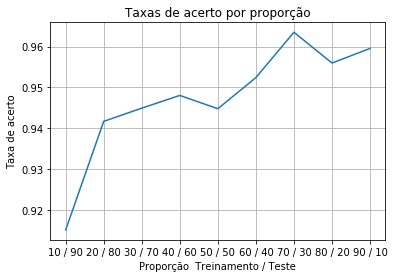

In [2]:
import math;
import pandas as pd;
import matplotlib.pyplot as plt;
import random;
import numpy as np;

%matplotlib inline
dataset1=[a.split("\t") for a in open("Iris dataset.dat","r" ,encoding="utf-8").readlines()]
dataset1=[[float(x) for x in a] for a in dataset1]

def RetOutlers():
    outlers=[0 for a in range(0,len(dataset1))];#lista para marcar as posições dos dados com outleirs. 0 =false; 1 true
    
    for a in range(0,4):
        dado=[x[a] for x in dataset1]#dado/coluna que será verificada para ver se encontra-se outleirs
        #print(dado)
        media=np.mean(dado);#media da coluna
        desP=np.std(dado);#desvio padrao da coluna que será usado para identificar outeirs
        q1,q3=np.percentile(sorted(dado),[25,75]);#valores para se usar no iqr
        iqr=q3-q1;#para identificar oulers por iqr
        
        for b in range(0, len(dataset1)):
            #verificando utilizando o metodo do desvio
            if(dado[b]>media+(2*desP) or dado[b]<media-(2*desP)):
                outlers[b]=1;
            #if(dado[b]>q3+(1.5*iqr) or dado[b]<q1-(1.5*iqr)):
                #outlers[b]=1;
    
    novoDataset=[];
    for a in range(0, len(dataset1)):
        if(outlers[a]==0):
            novoDataset.append(dataset1[a]);
        
    return novoDataset;
    
#novo dataset limpo
dataset=RetOutlers();
#tamanho do novo dataset limpo
tamanho=len(dataset)
#l1=novdat[:int(len(novdat)*0.1)]
#l2=novdat[int(len(novdat)*0.1):]


tamTeste=90;
tamTreinamento=10
AcertoClassif={"Treinamento/Teste":[],"TxMin":[],"TxMedia":[],"TxMax":[],"TxClasse1":[],"TxClasse2":[],"TxClasse3":[]};
#dicionário para armazenar os valores,taxas que serão usados em gráfico e etc
dist={}
#calcular distancias
for a in range(0,tamanho):
    for b in range(a+1,tamanho):
        dist[a,b]=math.sqrt(pow((dataset[b][0]-dataset[a][0]),2)+pow((dataset[b][1]-dataset[a][1]),2)+pow((dataset[b][2]-dataset[a][2]),2)+pow((dataset[b][3]-dataset[a][3]),2))

#função para buscar distancia no dicionario
def pegarDist(id1,id2):
    ids=[id1,id2];
    ids.sort();
    
    return dist[ids[0],ids[1]]
 
    #função para classificar
def classificar(teste, treinamento):
    distancias=[pegarDist(treinamento,a) for a in teste]
    indice=distancias.index(min(distancias));
    return dataset[(teste[indice])][4];


"""for a in range(1,50):
    print(dist[0,a]);

print(classificar(list(range(1,50)),0))
print(dist[0,17])"""    

#loop que continuará enquanto as proporções não forem 135/15(treinamento/teste)
while(tamTreinamento<=90 and tamTeste>=10):
    print("Calculando para proporção %r / %r"%(int(tamTreinamento),int(tamTeste)));
   
    
    acertosclasse1=0;#variavel aux para contar os acertos da classe 1
    acertosclasse2=0;#variavel aux para contar os acertos da classe 2
    acertosclasse3=0;#variavel aux para contar os acertos da classe 3
    acertototal=0;#variavel aux para contar acerto total
    minAcerto=10000;#variavel que guardará o valor min de acerto para cada proporção. é atualizada após cada rodada
    maxAcerto=0;#variavel para armazenar a quantidade máxima de acerto para cada proporção. é atualizada após cada rodada

    for x in range(0,30):
        somaAcerto=0;#variavel temp que somará o número de acertos de cada rodada, e ao final de cada rodada, é utilizada
        #pelo minAcerto, maxAcerto e acertototal
        #variavel para armazenar ids do dataset embaralhado
        datEmb=random.sample(list(range(0,tamanho)),tamanho);
        #dividindo dataset para treino e teste
        datTest=datEmb[:int((tamTeste*tamanho)/100)];
        datTrein=datEmb[int((tamTeste*tamanho)/100):];
        
        tTeste=len(datTest);
        tTrein=len(datTrein);
        
        
        #print(classificar(dataset[0:948],dataset.values[948]));
        #for para iterar pelo vetor de treinamento e utilizar o classificador
        #[tamTeste:] cria uma lista que começa a partir do fim do vetor de teste. depois do ultimo elemento
        for a in datTrein:
            if(classificar(datTest,a)==dataset[a][4]):
                somaAcerto+=1;#se o resultado da classificação for igual ao do vetor de treinamento
                #incrementa a variavel somaAcerto
                if(dataset[a][4]==1):
                    acertosclasse1+=1;#incrementa a variavel caso o resultado seja da classe 1
                elif(dataset[a][4]==2):
                    acertosclasse2+=1;#incrementa a variavel caso o resultado seja da classe 2
                elif(dataset[a][4]==3):
                    acertosclasse3+=1;#incrementa a variavel caso o resultado seja da classe 3

        #verificando se o valor de somaAerto é maior do que o maior valor atual
        if(somaAcerto>maxAcerto):
            maxAcerto=somaAcerto;#caso seja, o valor de somaAcerto é atribuido a maxAcerto

        #verificando se o valor de somaAcerto é menor do que o menor valor atual
        if(somaAcerto<minAcerto):
            minAcerto=somaAcerto;#caso seja, o valor de somaAcerto é atribuido a minAcerto

        acertototal+=somaAcerto;#incrementando acertotal com valor de somaAcerto
        
    #adiconando os valores de cada proporção ao campo correspondente no dicionário AcertoClassif
    #ao mesmo tempo que adiciona, calcula os valores das taxas, transforma em porcentagem
    AcertoClassif["Treinamento/Teste"].insert(0,str(int(tamTreinamento))+" / "+str(int(tamTeste)));
    AcertoClassif["TxMin"].insert(0,minAcerto/tTrein);
    AcertoClassif["TxMedia"].insert(0,acertototal/(tTrein*30));
    AcertoClassif["TxMax"].insert(0,maxAcerto/tTrein);
    AcertoClassif["TxClasse1"].insert(0,acertosclasse1/(acertototal));
    AcertoClassif["TxClasse2"].insert(0,acertosclasse2/(acertototal));
    AcertoClassif["TxClasse3"].insert(0,acertosclasse3/(acertototal));
    tamTeste-=10;#reduzindo em 100  tamanho do vetor de teste
    tamTreinamento+=10;#incrementando em 100 o tamanho do vetor de treinamento

#criando um dataframe com os valores do dicionário. Isso é só para ficar mais organizado
#na hora de mostrar os resultados de cada proporção
tabelaTx = pd.DataFrame(AcertoClassif, columns=["Treinamento/Teste","TxMin","TxMedia","TxMax","TxClasse1","TxClasse2","TxClasse3"]);

#printando o resultado da classificação
print(tabelaTx)

#plotando gráfico com as taxas de acerto por proporção

plt.figure();
plt.title("Taxas de acerto por proporção");
plt.grid();
plt.plot(AcertoClassif["Treinamento/Teste"][::-1],AcertoClassif["TxMedia"])[::-1];
plt.xlabel("Proporção  Treinamento / Teste");
plt.ylabel("Taxa de acerto");
plt.show();